In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [5]:
df.sample(6)

,FireplaceQu,GarageQual,SalePrice
189,Gd,TA,286000
1157,Gd,TA,230000
1277,Gd,TA,197900
320,NaN,TA,342643
327,NaN,TA,145250
1071,NaN,TA,154000


In [6]:
df.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [8]:
df.isna().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [9]:
df.isna().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

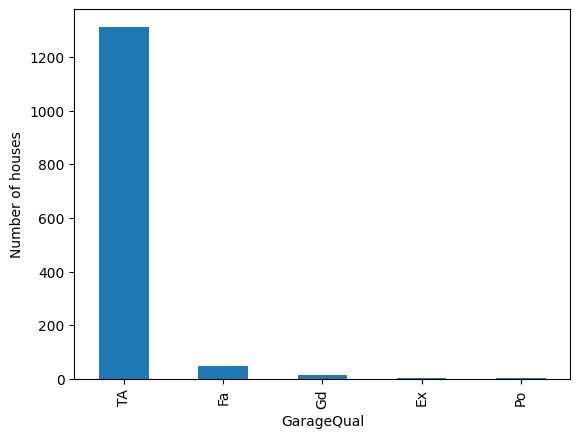

In [10]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [11]:
df['GarageQual'].fillna('Missing', inplace=True)

C:\Users\shoab\AppData\Local\Temp\ipykernel_13332\4070582888.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('Missing', inplace=True)


Text(0, 0.5, 'Number of houses')

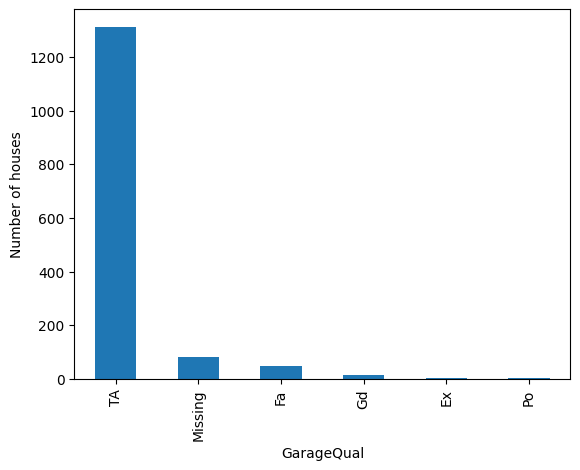

In [12]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [15]:
from sklearn.impute import SimpleImputer

In [17]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [23]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_train)

In [24]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

In [25]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


<Axes: xlabel='GarageQual'>

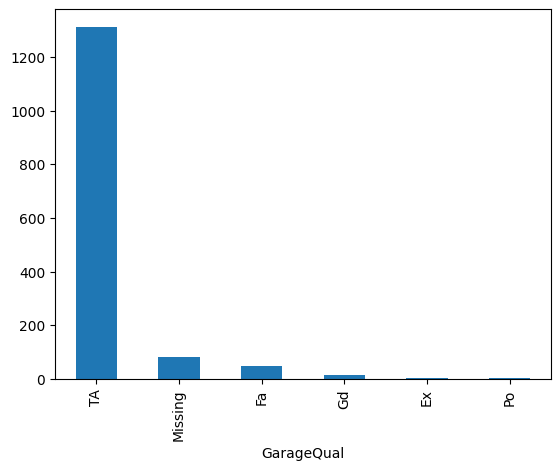

In [26]:
df['GarageQual'].value_counts().plot(kind='bar')

In [27]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

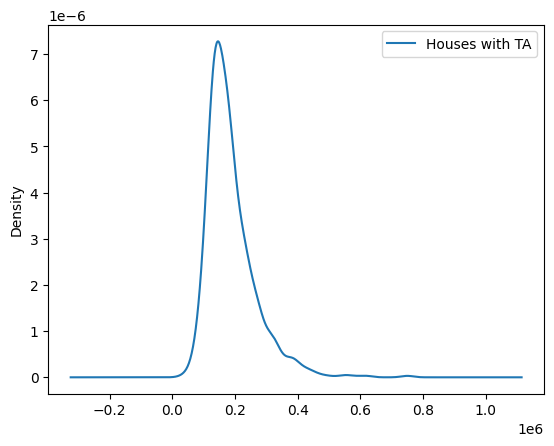

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)


ta_subset = df[df['GarageQual'] == 'TA']['SalePrice'].dropna()
ta_subset.plot(kind='kde', ax=ax, label='Houses with TA')


na_subset = df[df['GarageQual'].isnull()]['SalePrice'].dropna()

if not na_subset.empty:
    na_subset.plot(kind='kde', ax=ax, color='red', label='Houses with NA')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels)
plt.show()


In [35]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [36]:

df['GarageQual'].fillna('TA', inplace=True)

<Axes: xlabel='GarageQual'>

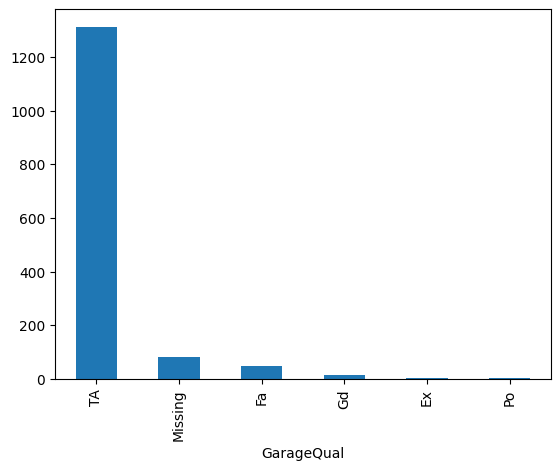

In [37]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

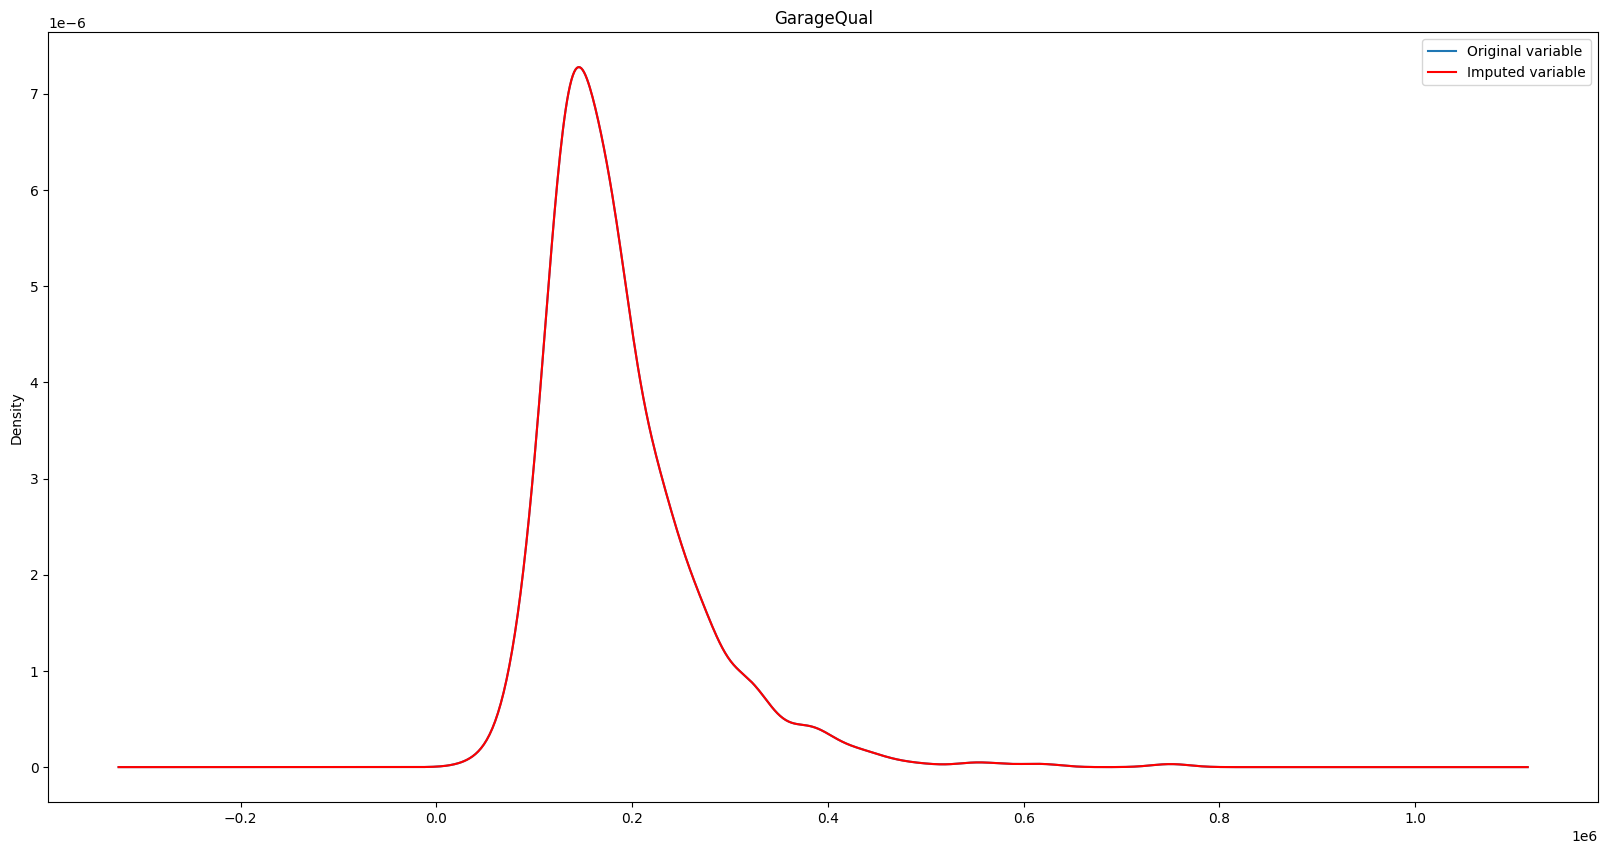

In [39]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

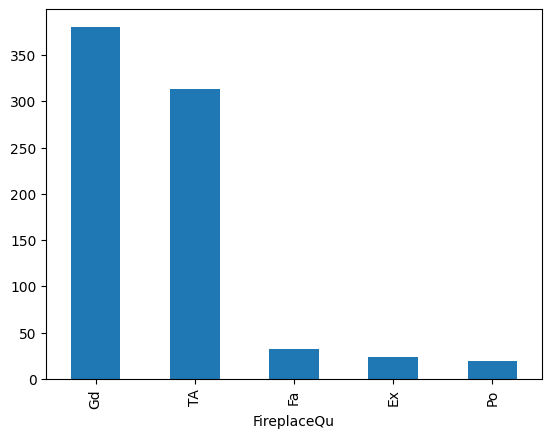

In [40]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [41]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

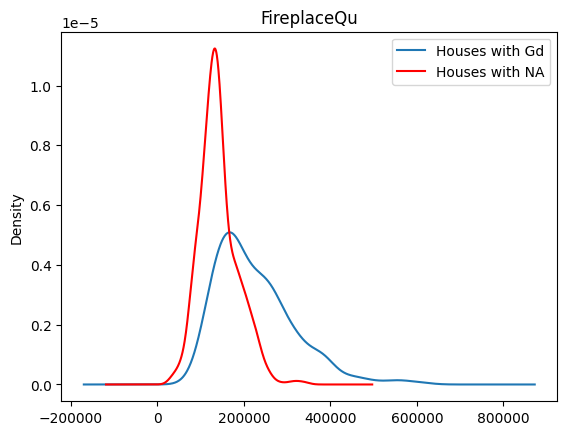

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [46]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [47]:
df['FireplaceQu'].fillna('Gd', inplace=True)

C:\Users\shoab\AppData\Local\Temp\ipykernel_13332\3912738894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd', inplace=True)


<Axes: xlabel='FireplaceQu'>

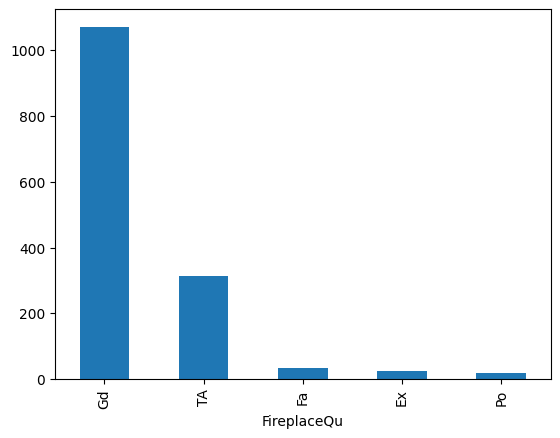

In [48]:

df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

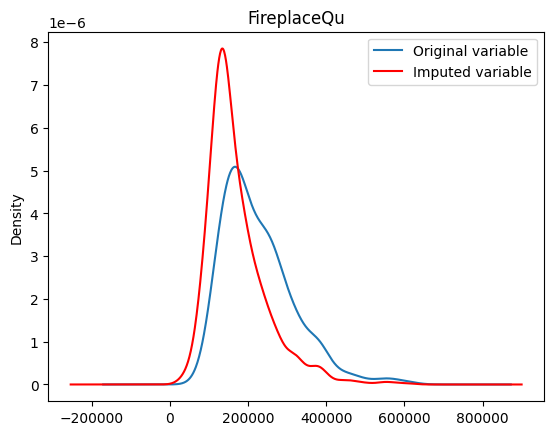

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [51]:
from sklearn.impute import SimpleImputer

In [54]:
imputer = SimpleImputer(strategy='most_frequent')

In [55]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [57]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)